# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [2]:
data_dir = '/data'
!pip install matplotlib==2.0.2
# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'
()

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

    100% |████████████████████████████████| 14.6MB 36kB/s  eta 0:00:01
  Found existing installation: matplotlib 2.1.0
    Uninstalling matplotlib-2.1.0:
      Successfully uninstalled matplotlib-2.1.0
You are using pip version 9.0.1, however version 19.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

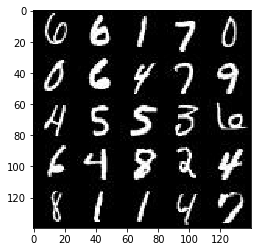

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

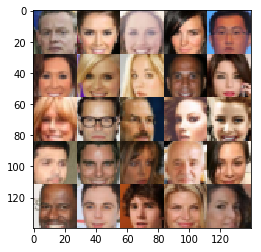

In [4]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [5]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.3.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [6]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function

    inputReal = tf.placeholder(tf.float32, shape=[None, image_width, image_height, image_channels], name = "inputReal")
    inputZ = tf.placeholder(tf.float32, shape=[None, z_dim], name = 'inputZ')
    learningRate = tf.placeholder(tf.float32, name = 'learningRate')
    
    return inputReal,    inputZ,    learningRate

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Operation'>):
<tf.Operation 'assert_rank_2/Assert/Assert' type=Assert>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
['File "/opt/conda/lib/python3.6/runpy.py", line 193, in _run_module_as_main\n    "__main__", mod_spec)', 'File "/opt/conda/lib/python3.6/runpy.py", line 85, in _run_code\n    exec(code, run_globals)', 'File "/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>\n    app.launch_new_instance()', 'File "/opt/conda/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance\n    app.start()', 'File "/opt/conda/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 497, in start\n    self.io_loop.start()', 'File "/opt/conda/lib/python3.6/site-packages/tornado/ioloop.py", line 832, in start\n    self._run_callback(self._callbacks.popleft())', 'File

### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [7]:
# def discriminator(images, reuse=False):
def discriminator(x, reuse=False, alpha=0.2):
    images = x
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """

    with tf.variable_scope('discriminator', reuse=reuse):
        # Input layer is 32x32x3
        x1 = tf.layers.conv2d(x, 64, 5, strides=2, padding='same')
        relu1 = tf.maximum(alpha * x1, x1)
        # 16x16x64
        
        x2 = tf.layers.conv2d(relu1, 128, 5, strides=2, padding='same')
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(alpha * bn2, bn2)
        # 8x8x128
        
        x3 = tf.layers.conv2d(relu2, 256, 5, strides=2, padding='same')
        bn3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = tf.maximum(alpha * bn3, bn3)
        # 4x4x256

        # Flatten it
        flat = tf.reshape(relu3, (-1, 4*4*256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
        
        return out, logits
    
    
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [8]:
# def generator(z, out_channel_dim, is_train=True):
def generator(z, out_channel_dim, is_train=True, alpha=0.2):
    output_dim = out_channel_dim
#     training = is_train 
    
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    
    with tf.variable_scope('generator', reuse=not is_train):
        # First fully connected layer
        x1 = tf.layers.dense(z, 7*7*512)
        # Reshape it to start the convolutional stack
        x1 = tf.reshape(x1, (-1, 7, 7, 512))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha * x1, x1)
        # 7x7x256 now
        
        x2 = tf.layers.conv2d_transpose(x1, 256, 5, strides=1, padding='same')
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(alpha * x2, x2)
#         8x8x256 now
        
        x2 = tf.layers.conv2d_transpose(x2, 128, 5, strides=2, padding='same')
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(alpha * x2, x2)
#         8x8x256 now
        
#         x2 = tf.layers.conv2d_transpose(x2, 256, 5, strides=2, padding='same')
#         x2 = tf.layers.batch_normalization(x2, training=is_train)
#         x2 = tf.maximum(alpha * x2, x2)
#         8x8x256 now
        
        x3 = tf.layers.conv2d_transpose(x2, 64, 5, strides=2, padding='same')
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(alpha * x3, x3)
        # 16x16x128 now
        
        # Output layer
        logits = tf.layers.conv2d_transpose(x3, output_dim, 3, strides=1, padding='same')
        # 32x32x3 now
        
        out = tf.tanh(logits)
        
        return out
    
    
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [9]:
# def model_loss(input_real, input_z, out_channel_dim):
def model_loss(input_real, input_z, output_dim, alpha=0.2):
    out_channel_dim = output_dim
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    g_model = generator(input_z, output_dim, alpha=alpha)
    d_model_real, d_logits_real = discriminator(input_real, alpha=alpha)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True, alpha=alpha)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=0.9*tf.ones_like(d_model_real)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake

    return d_loss, g_loss



"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [10]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # Get weights and bias to update
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt



"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [11]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [41]:
# finding max/min of real images
# for b in celeba_dataset.get_batches(2):
#     print(type(b))
# x = celeba_dataset.get_batches(1)
# y = next(x)
# print(y.shape)
# np.min(y)

(1, 28, 28, 3)


-0.31568629

In [42]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    steps = 0
    
    # data shape
    _, image_width, image_height, image_channels = data_shape

    # use predefined functions
    input_real, input_z, learningRate = model_inputs(image_width, image_height, image_channels, z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, image_channels)
    d_train_opt, g_train_opt = model_opt(d_loss, g_loss, learning_rate, beta1)    
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for e in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # images are shifted from [0..1] by -0.5, giving [-0.5..0.5],
                # so we need to *2 to get [-1..1], similar to tanh
                batch_images *= 2
                steps += 1

                # Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))

                # Run optimizers
                _ = sess.run(d_train_opt, feed_dict={input_real: batch_images, input_z: batch_z, learningRate : learning_rate})
                _ = sess.run(g_train_opt, feed_dict={input_real: batch_images, input_z: batch_z, learningRate : learning_rate})
#                 _ = sess.run(g_train_opt, feed_dict={net.input_z: batch_z, net.input_real: x})

                if steps % print_every == 0:
                    # At the end of each epoch, get the losses and print them out
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(e+1, epochs),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
#                     # Save losses to view after training
#                     losses.append((train_loss_d, train_loss_g))

                if steps % show_every == 0:
                    show_generator_output(sess, n_images, input_z, image_channels, data_image_mode)
#                     gen_samples = sess.run(
#                                    generator(net.input_z, 3, reuse=True, training=False),
#                                    feed_dict={net.input_z: sample_z})
#                     samples.append(gen_samples)
#                     _ = view_samples(-1, samples, 6, 12, figsize=figsize)
#                     plt.show()

                
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 3.1781... Generator Loss: 0.3233
Epoch 1/2... Discriminator Loss: 2.0574... Generator Loss: 0.3404
Epoch 1/2... Discriminator Loss: 2.6316... Generator Loss: 0.1594
Epoch 1/2... Discriminator Loss: 2.2149... Generator Loss: 0.8747
Epoch 1/2... Discriminator Loss: 1.9773... Generator Loss: 0.6698


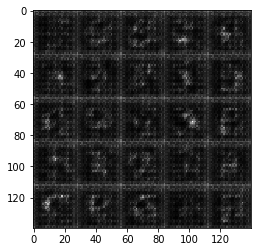

Epoch 1/2... Discriminator Loss: 1.7328... Generator Loss: 0.4931
Epoch 1/2... Discriminator Loss: 2.1014... Generator Loss: 0.2712
Epoch 1/2... Discriminator Loss: 2.3326... Generator Loss: 0.1805
Epoch 1/2... Discriminator Loss: 1.6817... Generator Loss: 0.9716
Epoch 1/2... Discriminator Loss: 2.5385... Generator Loss: 0.1411


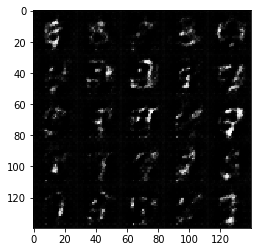

Epoch 1/2... Discriminator Loss: 1.6613... Generator Loss: 0.5464
Epoch 1/2... Discriminator Loss: 1.7203... Generator Loss: 0.3754
Epoch 1/2... Discriminator Loss: 1.2494... Generator Loss: 0.9244
Epoch 1/2... Discriminator Loss: 1.6283... Generator Loss: 0.4239
Epoch 1/2... Discriminator Loss: 1.6093... Generator Loss: 0.4649


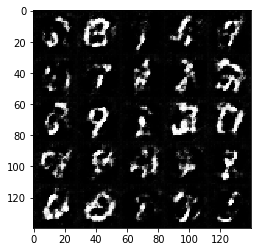

Epoch 1/2... Discriminator Loss: 1.4067... Generator Loss: 0.9319
Epoch 1/2... Discriminator Loss: 1.6688... Generator Loss: 0.3665
Epoch 1/2... Discriminator Loss: 1.7588... Generator Loss: 0.3437
Epoch 1/2... Discriminator Loss: 1.6727... Generator Loss: 0.3893
Epoch 1/2... Discriminator Loss: 1.4262... Generator Loss: 0.6471


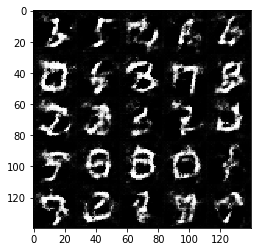

Epoch 1/2... Discriminator Loss: 1.9802... Generator Loss: 0.2651
Epoch 1/2... Discriminator Loss: 1.4965... Generator Loss: 0.7330
Epoch 1/2... Discriminator Loss: 1.8389... Generator Loss: 0.3601
Epoch 1/2... Discriminator Loss: 1.6133... Generator Loss: 0.6481
Epoch 1/2... Discriminator Loss: 1.8336... Generator Loss: 0.3102


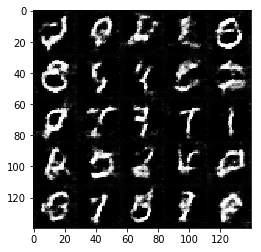

Epoch 1/2... Discriminator Loss: 1.3746... Generator Loss: 0.6445
Epoch 1/2... Discriminator Loss: 1.4343... Generator Loss: 0.5439
Epoch 1/2... Discriminator Loss: 1.6347... Generator Loss: 0.4046
Epoch 1/2... Discriminator Loss: 1.7036... Generator Loss: 0.4842
Epoch 1/2... Discriminator Loss: 1.4115... Generator Loss: 0.8464


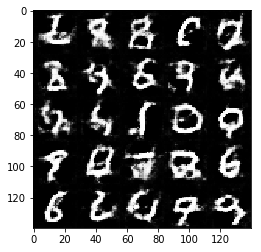

Epoch 1/2... Discriminator Loss: 1.7952... Generator Loss: 0.3415
Epoch 1/2... Discriminator Loss: 1.8270... Generator Loss: 0.3066
Epoch 1/2... Discriminator Loss: 1.5523... Generator Loss: 0.5158
Epoch 1/2... Discriminator Loss: 1.6821... Generator Loss: 0.3504
Epoch 1/2... Discriminator Loss: 1.2063... Generator Loss: 0.7401


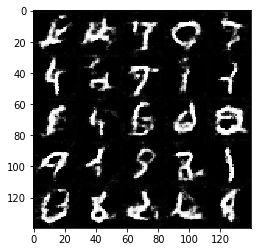

Epoch 1/2... Discriminator Loss: 1.7885... Generator Loss: 0.3152
Epoch 1/2... Discriminator Loss: 1.6018... Generator Loss: 0.3812
Epoch 1/2... Discriminator Loss: 1.4084... Generator Loss: 0.7803
Epoch 1/2... Discriminator Loss: 1.2652... Generator Loss: 0.8133
Epoch 1/2... Discriminator Loss: 1.4404... Generator Loss: 0.5635


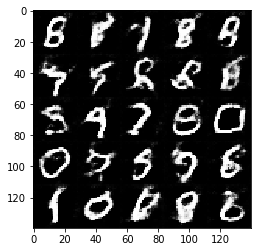

Epoch 1/2... Discriminator Loss: 1.1485... Generator Loss: 1.3322
Epoch 1/2... Discriminator Loss: 1.5278... Generator Loss: 0.5298
Epoch 1/2... Discriminator Loss: 1.5820... Generator Loss: 0.3949
Epoch 1/2... Discriminator Loss: 1.6857... Generator Loss: 0.3899
Epoch 1/2... Discriminator Loss: 1.7552... Generator Loss: 0.3659


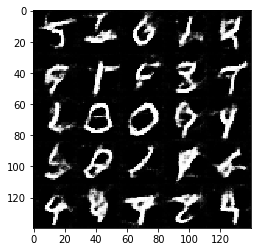

Epoch 1/2... Discriminator Loss: 1.3743... Generator Loss: 0.8274
Epoch 1/2... Discriminator Loss: 1.7242... Generator Loss: 0.2972
Epoch 1/2... Discriminator Loss: 1.3693... Generator Loss: 0.5500
Epoch 1/2... Discriminator Loss: 1.1529... Generator Loss: 0.7413
Epoch 1/2... Discriminator Loss: 1.6803... Generator Loss: 0.3458


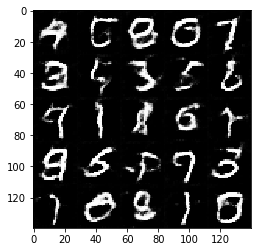

Epoch 1/2... Discriminator Loss: 1.5520... Generator Loss: 0.4575
Epoch 1/2... Discriminator Loss: 1.3591... Generator Loss: 0.9867
Epoch 1/2... Discriminator Loss: 1.5048... Generator Loss: 0.4104
Epoch 1/2... Discriminator Loss: 1.5643... Generator Loss: 0.4052
Epoch 1/2... Discriminator Loss: 1.3601... Generator Loss: 0.5980


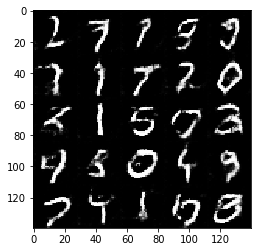

Epoch 1/2... Discriminator Loss: 1.2490... Generator Loss: 0.6429
Epoch 1/2... Discriminator Loss: 1.2246... Generator Loss: 0.6632
Epoch 1/2... Discriminator Loss: 1.2524... Generator Loss: 1.3628
Epoch 1/2... Discriminator Loss: 1.4866... Generator Loss: 0.4877
Epoch 1/2... Discriminator Loss: 1.0630... Generator Loss: 0.7946


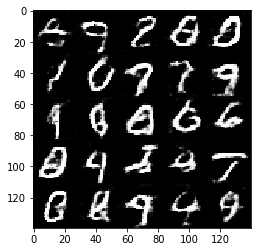

Epoch 1/2... Discriminator Loss: 1.5139... Generator Loss: 0.4318
Epoch 1/2... Discriminator Loss: 1.3942... Generator Loss: 0.5250
Epoch 1/2... Discriminator Loss: 1.2238... Generator Loss: 0.8684
Epoch 1/2... Discriminator Loss: 1.2692... Generator Loss: 1.0382
Epoch 1/2... Discriminator Loss: 1.4573... Generator Loss: 0.5177


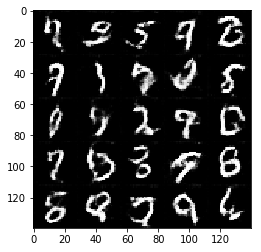

Epoch 1/2... Discriminator Loss: 1.1120... Generator Loss: 0.8795
Epoch 1/2... Discriminator Loss: 1.5100... Generator Loss: 0.4166
Epoch 1/2... Discriminator Loss: 1.3036... Generator Loss: 0.6126
Epoch 1/2... Discriminator Loss: 1.3041... Generator Loss: 0.5372
Epoch 1/2... Discriminator Loss: 2.0289... Generator Loss: 0.2522


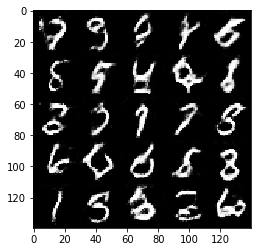

Epoch 1/2... Discriminator Loss: 1.2511... Generator Loss: 0.6287
Epoch 1/2... Discriminator Loss: 1.3043... Generator Loss: 0.8128
Epoch 1/2... Discriminator Loss: 1.2814... Generator Loss: 0.5712
Epoch 1/2... Discriminator Loss: 1.2111... Generator Loss: 1.2224
Epoch 1/2... Discriminator Loss: 1.1122... Generator Loss: 1.2308


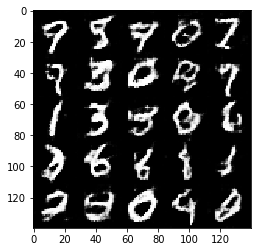

Epoch 1/2... Discriminator Loss: 1.2085... Generator Loss: 0.9047
Epoch 1/2... Discriminator Loss: 1.1894... Generator Loss: 0.7444
Epoch 1/2... Discriminator Loss: 1.6925... Generator Loss: 0.3545
Epoch 1/2... Discriminator Loss: 1.1710... Generator Loss: 0.9469
Epoch 1/2... Discriminator Loss: 1.2825... Generator Loss: 0.9133


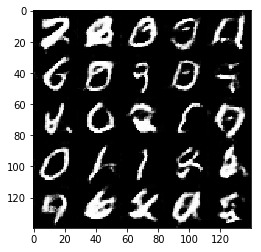

Epoch 1/2... Discriminator Loss: 1.2494... Generator Loss: 0.5891
Epoch 1/2... Discriminator Loss: 1.6597... Generator Loss: 0.3657
Epoch 1/2... Discriminator Loss: 1.3081... Generator Loss: 0.5822
Epoch 1/2... Discriminator Loss: 1.5358... Generator Loss: 1.0565
Epoch 1/2... Discriminator Loss: 1.3404... Generator Loss: 0.5134


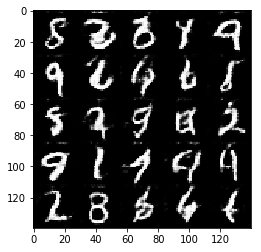

Epoch 1/2... Discriminator Loss: 0.8901... Generator Loss: 1.0057
Epoch 1/2... Discriminator Loss: 1.0686... Generator Loss: 0.7513
Epoch 1/2... Discriminator Loss: 1.3033... Generator Loss: 0.9355
Epoch 1/2... Discriminator Loss: 2.0211... Generator Loss: 2.1058
Epoch 1/2... Discriminator Loss: 1.0283... Generator Loss: 0.8990


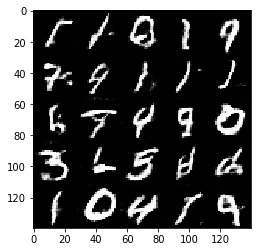

Epoch 1/2... Discriminator Loss: 1.2783... Generator Loss: 0.5676
Epoch 1/2... Discriminator Loss: 1.1472... Generator Loss: 0.8182
Epoch 1/2... Discriminator Loss: 1.5724... Generator Loss: 0.3936
Epoch 1/2... Discriminator Loss: 1.1612... Generator Loss: 0.8658
Epoch 1/2... Discriminator Loss: 0.9470... Generator Loss: 1.5103


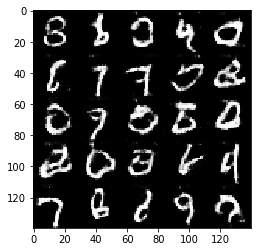

Epoch 1/2... Discriminator Loss: 0.9686... Generator Loss: 1.2732
Epoch 1/2... Discriminator Loss: 0.9409... Generator Loss: 1.1021
Epoch 1/2... Discriminator Loss: 1.2588... Generator Loss: 1.4209
Epoch 1/2... Discriminator Loss: 1.2490... Generator Loss: 0.6220
Epoch 1/2... Discriminator Loss: 1.0532... Generator Loss: 1.3903


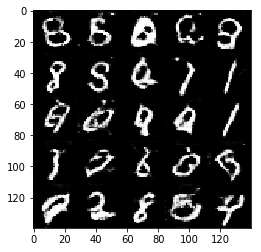

Epoch 1/2... Discriminator Loss: 1.0139... Generator Loss: 0.8708
Epoch 1/2... Discriminator Loss: 1.0073... Generator Loss: 0.7825
Epoch 1/2... Discriminator Loss: 1.0252... Generator Loss: 1.3453
Epoch 1/2... Discriminator Loss: 1.1000... Generator Loss: 0.7530
Epoch 1/2... Discriminator Loss: 1.1004... Generator Loss: 0.8004


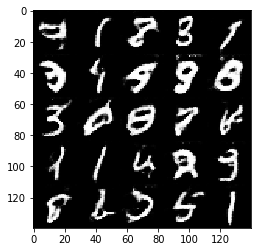

Epoch 1/2... Discriminator Loss: 1.3620... Generator Loss: 0.5211
Epoch 1/2... Discriminator Loss: 1.4209... Generator Loss: 0.5411
Epoch 1/2... Discriminator Loss: 1.2308... Generator Loss: 0.5783
Epoch 1/2... Discriminator Loss: 1.3483... Generator Loss: 0.5427
Epoch 1/2... Discriminator Loss: 1.1635... Generator Loss: 1.8416


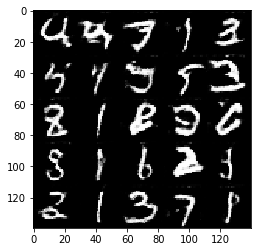

Epoch 1/2... Discriminator Loss: 1.2212... Generator Loss: 0.5774
Epoch 1/2... Discriminator Loss: 1.1736... Generator Loss: 0.6558
Epoch 1/2... Discriminator Loss: 0.8654... Generator Loss: 1.0887
Epoch 1/2... Discriminator Loss: 0.9860... Generator Loss: 1.1612
Epoch 1/2... Discriminator Loss: 1.5455... Generator Loss: 0.4631


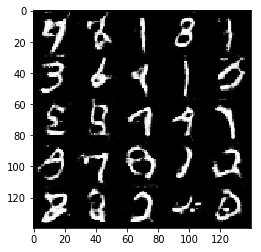

Epoch 1/2... Discriminator Loss: 1.1380... Generator Loss: 1.0828
Epoch 1/2... Discriminator Loss: 0.7834... Generator Loss: 1.3195
Epoch 1/2... Discriminator Loss: 1.1999... Generator Loss: 1.9576
Epoch 1/2... Discriminator Loss: 0.7500... Generator Loss: 1.5189
Epoch 1/2... Discriminator Loss: 1.1767... Generator Loss: 0.6367


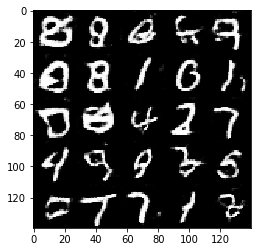

Epoch 1/2... Discriminator Loss: 1.2502... Generator Loss: 0.6566
Epoch 1/2... Discriminator Loss: 1.0831... Generator Loss: 0.7521
Epoch 1/2... Discriminator Loss: 0.9952... Generator Loss: 1.9237
Epoch 1/2... Discriminator Loss: 1.5270... Generator Loss: 0.4377
Epoch 1/2... Discriminator Loss: 0.8968... Generator Loss: 1.0659


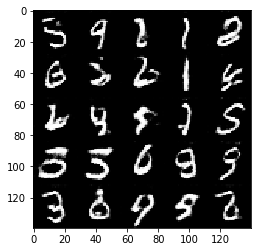

Epoch 1/2... Discriminator Loss: 1.0966... Generator Loss: 0.7907
Epoch 1/2... Discriminator Loss: 1.5264... Generator Loss: 0.4405
Epoch 1/2... Discriminator Loss: 1.4945... Generator Loss: 0.4341
Epoch 1/2... Discriminator Loss: 1.0268... Generator Loss: 0.7675
Epoch 1/2... Discriminator Loss: 1.0907... Generator Loss: 0.7410


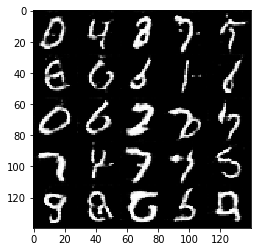

Epoch 1/2... Discriminator Loss: 2.2356... Generator Loss: 0.1975
Epoch 1/2... Discriminator Loss: 0.9443... Generator Loss: 0.9568
Epoch 1/2... Discriminator Loss: 2.2019... Generator Loss: 0.2101
Epoch 1/2... Discriminator Loss: 0.9744... Generator Loss: 0.8378
Epoch 1/2... Discriminator Loss: 1.5479... Generator Loss: 0.4036


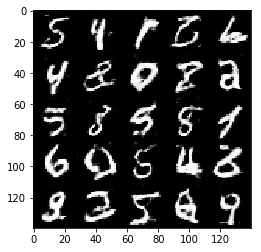

Epoch 1/2... Discriminator Loss: 0.9584... Generator Loss: 0.9001
Epoch 1/2... Discriminator Loss: 1.2662... Generator Loss: 0.6401
Epoch 1/2... Discriminator Loss: 1.1069... Generator Loss: 0.7323


KeyboardInterrupt: 

In [13]:
batch_size = 16
z_dim = 256
learning_rate = 0.0008
beta1 = 0.2
print_every = 20
show_every = 100
n_images = 25


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 1.6086... Generator Loss: 1.4237
Epoch 1/1... Discriminator Loss: 1.3160... Generator Loss: 0.7513
Epoch 1/1... Discriminator Loss: 1.6469... Generator Loss: 1.6595
Epoch 1/1... Discriminator Loss: 1.5715... Generator Loss: 0.5926
Epoch 1/1... Discriminator Loss: 1.3473... Generator Loss: 0.7889
Epoch 1/1... Discriminator Loss: 1.8975... Generator Loss: 0.3247


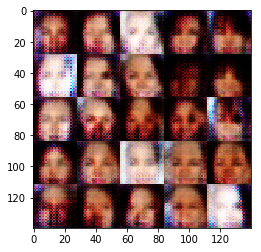

Epoch 1/1... Discriminator Loss: 1.3821... Generator Loss: 0.9624
Epoch 1/1... Discriminator Loss: 1.3434... Generator Loss: 0.8492
Epoch 1/1... Discriminator Loss: 1.6460... Generator Loss: 0.6775
Epoch 1/1... Discriminator Loss: 1.7143... Generator Loss: 0.6069
Epoch 1/1... Discriminator Loss: 1.3721... Generator Loss: 0.7734
Epoch 1/1... Discriminator Loss: 1.3816... Generator Loss: 0.9629
Epoch 1/1... Discriminator Loss: 2.9387... Generator Loss: 0.1083


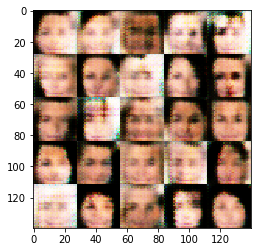

Epoch 1/1... Discriminator Loss: 1.3839... Generator Loss: 1.1144
Epoch 1/1... Discriminator Loss: 1.4861... Generator Loss: 0.7820
Epoch 1/1... Discriminator Loss: 1.0609... Generator Loss: 0.8061
Epoch 1/1... Discriminator Loss: 1.3833... Generator Loss: 0.6042
Epoch 1/1... Discriminator Loss: 2.2428... Generator Loss: 0.2547
Epoch 1/1... Discriminator Loss: 1.2908... Generator Loss: 1.1466
Epoch 1/1... Discriminator Loss: 1.3949... Generator Loss: 0.6778


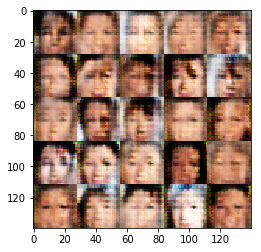

Epoch 1/1... Discriminator Loss: 1.1709... Generator Loss: 0.8242
Epoch 1/1... Discriminator Loss: 1.6128... Generator Loss: 0.4400
Epoch 1/1... Discriminator Loss: 1.4727... Generator Loss: 0.6617
Epoch 1/1... Discriminator Loss: 1.2115... Generator Loss: 0.9371
Epoch 1/1... Discriminator Loss: 1.5658... Generator Loss: 0.7884
Epoch 1/1... Discriminator Loss: 1.4029... Generator Loss: 0.6504


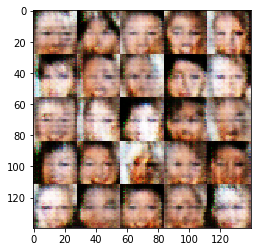

Epoch 1/1... Discriminator Loss: 1.4325... Generator Loss: 0.7491
Epoch 1/1... Discriminator Loss: 1.6899... Generator Loss: 0.3666
Epoch 1/1... Discriminator Loss: 1.5413... Generator Loss: 0.6643
Epoch 1/1... Discriminator Loss: 1.3782... Generator Loss: 0.7396
Epoch 1/1... Discriminator Loss: 1.7195... Generator Loss: 0.3397
Epoch 1/1... Discriminator Loss: 1.3290... Generator Loss: 0.7293
Epoch 1/1... Discriminator Loss: 1.2131... Generator Loss: 0.6210


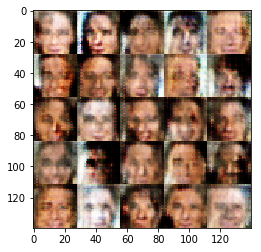

Epoch 1/1... Discriminator Loss: 1.2830... Generator Loss: 0.8034
Epoch 1/1... Discriminator Loss: 1.4315... Generator Loss: 0.6782
Epoch 1/1... Discriminator Loss: 1.5319... Generator Loss: 0.4081
Epoch 1/1... Discriminator Loss: 1.3058... Generator Loss: 0.7200
Epoch 1/1... Discriminator Loss: 1.6776... Generator Loss: 1.1835
Epoch 1/1... Discriminator Loss: 1.6253... Generator Loss: 0.6455
Epoch 1/1... Discriminator Loss: 1.7827... Generator Loss: 0.4483


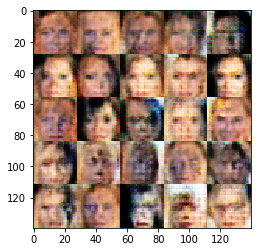

Epoch 1/1... Discriminator Loss: 1.6857... Generator Loss: 0.5862
Epoch 1/1... Discriminator Loss: 1.4223... Generator Loss: 0.6658
Epoch 1/1... Discriminator Loss: 1.4035... Generator Loss: 0.7162
Epoch 1/1... Discriminator Loss: 1.7183... Generator Loss: 0.3774
Epoch 1/1... Discriminator Loss: 1.4148... Generator Loss: 0.7202
Epoch 1/1... Discriminator Loss: 1.5252... Generator Loss: 0.7825


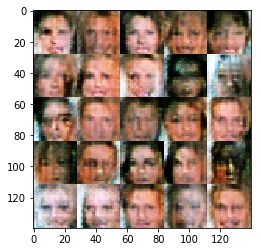

Epoch 1/1... Discriminator Loss: 1.6582... Generator Loss: 0.5690
Epoch 1/1... Discriminator Loss: 1.4287... Generator Loss: 0.6807
Epoch 1/1... Discriminator Loss: 1.4517... Generator Loss: 0.8200
Epoch 1/1... Discriminator Loss: 1.4193... Generator Loss: 0.7279
Epoch 1/1... Discriminator Loss: 1.3832... Generator Loss: 0.7330
Epoch 1/1... Discriminator Loss: 1.5031... Generator Loss: 0.4962
Epoch 1/1... Discriminator Loss: 1.4005... Generator Loss: 1.0095


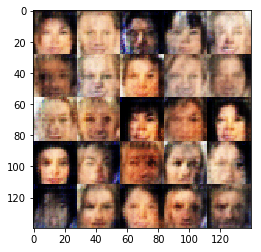

Epoch 1/1... Discriminator Loss: 1.4052... Generator Loss: 0.8258
Epoch 1/1... Discriminator Loss: 1.7050... Generator Loss: 0.4228
Epoch 1/1... Discriminator Loss: 1.4323... Generator Loss: 0.5420
Epoch 1/1... Discriminator Loss: 1.4326... Generator Loss: 0.6261
Epoch 1/1... Discriminator Loss: 1.4874... Generator Loss: 0.6029
Epoch 1/1... Discriminator Loss: 1.3886... Generator Loss: 0.7398
Epoch 1/1... Discriminator Loss: 1.3336... Generator Loss: 0.6570


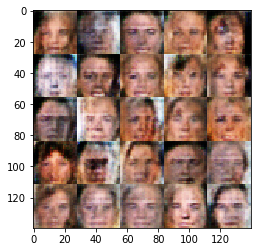

Epoch 1/1... Discriminator Loss: 1.6238... Generator Loss: 0.6265
Epoch 1/1... Discriminator Loss: 1.4890... Generator Loss: 0.7528
Epoch 1/1... Discriminator Loss: 1.3532... Generator Loss: 0.8974
Epoch 1/1... Discriminator Loss: 1.4703... Generator Loss: 0.7222
Epoch 1/1... Discriminator Loss: 1.5099... Generator Loss: 0.5397
Epoch 1/1... Discriminator Loss: 1.5582... Generator Loss: 0.6855


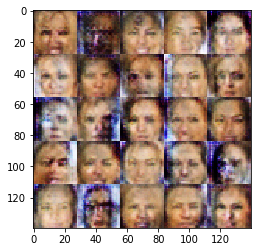

Epoch 1/1... Discriminator Loss: 1.3228... Generator Loss: 0.6434
Epoch 1/1... Discriminator Loss: 1.3855... Generator Loss: 0.7359
Epoch 1/1... Discriminator Loss: 1.2108... Generator Loss: 0.7706
Epoch 1/1... Discriminator Loss: 1.3779... Generator Loss: 0.8236
Epoch 1/1... Discriminator Loss: 1.4877... Generator Loss: 0.7456
Epoch 1/1... Discriminator Loss: 1.4363... Generator Loss: 0.7295
Epoch 1/1... Discriminator Loss: 1.4437... Generator Loss: 0.7145


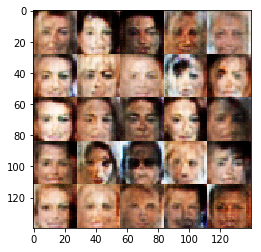

Epoch 1/1... Discriminator Loss: 1.4420... Generator Loss: 0.7012
Epoch 1/1... Discriminator Loss: 1.4132... Generator Loss: 0.7502
Epoch 1/1... Discriminator Loss: 1.4233... Generator Loss: 0.5769
Epoch 1/1... Discriminator Loss: 1.2324... Generator Loss: 0.6765
Epoch 1/1... Discriminator Loss: 1.3643... Generator Loss: 0.6401
Epoch 1/1... Discriminator Loss: 1.4084... Generator Loss: 0.7866
Epoch 1/1... Discriminator Loss: 1.4037... Generator Loss: 0.7066


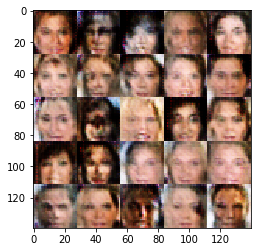

Epoch 1/1... Discriminator Loss: 1.4652... Generator Loss: 0.6216
Epoch 1/1... Discriminator Loss: 1.4356... Generator Loss: 1.0168
Epoch 1/1... Discriminator Loss: 1.4196... Generator Loss: 0.6250
Epoch 1/1... Discriminator Loss: 1.4122... Generator Loss: 0.6921
Epoch 1/1... Discriminator Loss: 1.4055... Generator Loss: 0.6530
Epoch 1/1... Discriminator Loss: 1.3683... Generator Loss: 0.6319


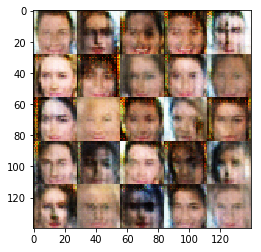

Epoch 1/1... Discriminator Loss: 1.3595... Generator Loss: 0.7117
Epoch 1/1... Discriminator Loss: 1.3518... Generator Loss: 0.6254
Epoch 1/1... Discriminator Loss: 1.4382... Generator Loss: 0.6686
Epoch 1/1... Discriminator Loss: 1.4248... Generator Loss: 0.7349
Epoch 1/1... Discriminator Loss: 1.3851... Generator Loss: 0.6553
Epoch 1/1... Discriminator Loss: 1.4252... Generator Loss: 0.7087
Epoch 1/1... Discriminator Loss: 1.4816... Generator Loss: 0.5381


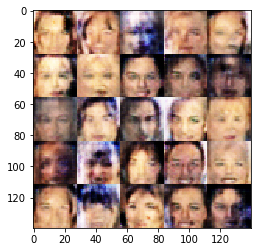

Epoch 1/1... Discriminator Loss: 1.4013... Generator Loss: 0.7256
Epoch 1/1... Discriminator Loss: 1.4755... Generator Loss: 0.6740
Epoch 1/1... Discriminator Loss: 1.3532... Generator Loss: 0.6832
Epoch 1/1... Discriminator Loss: 1.3756... Generator Loss: 0.8349
Epoch 1/1... Discriminator Loss: 1.3133... Generator Loss: 0.6585
Epoch 1/1... Discriminator Loss: 1.4734... Generator Loss: 0.7973
Epoch 1/1... Discriminator Loss: 1.5457... Generator Loss: 0.5082


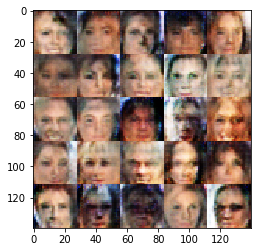

Epoch 1/1... Discriminator Loss: 1.3569... Generator Loss: 0.7264
Epoch 1/1... Discriminator Loss: 1.3441... Generator Loss: 0.6147
Epoch 1/1... Discriminator Loss: 1.4384... Generator Loss: 0.6209
Epoch 1/1... Discriminator Loss: 1.3252... Generator Loss: 0.6144
Epoch 1/1... Discriminator Loss: 1.5090... Generator Loss: 0.6839
Epoch 1/1... Discriminator Loss: 1.3584... Generator Loss: 0.8395


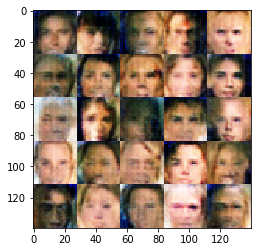

Epoch 1/1... Discriminator Loss: 1.4355... Generator Loss: 0.7843
Epoch 1/1... Discriminator Loss: 1.4470... Generator Loss: 0.6165
Epoch 1/1... Discriminator Loss: 1.5223... Generator Loss: 0.6792
Epoch 1/1... Discriminator Loss: 1.4133... Generator Loss: 0.7657
Epoch 1/1... Discriminator Loss: 1.5417... Generator Loss: 0.7549
Epoch 1/1... Discriminator Loss: 1.3626... Generator Loss: 0.7869
Epoch 1/1... Discriminator Loss: 1.4303... Generator Loss: 0.7050


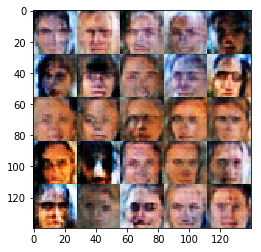

Epoch 1/1... Discriminator Loss: 1.4861... Generator Loss: 0.5495
Epoch 1/1... Discriminator Loss: 1.4634... Generator Loss: 0.7023
Epoch 1/1... Discriminator Loss: 1.3637... Generator Loss: 0.7590
Epoch 1/1... Discriminator Loss: 1.3961... Generator Loss: 0.6443
Epoch 1/1... Discriminator Loss: 1.4834... Generator Loss: 0.7416
Epoch 1/1... Discriminator Loss: 1.5172... Generator Loss: 0.7620
Epoch 1/1... Discriminator Loss: 1.2764... Generator Loss: 0.7934


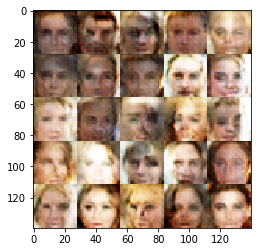

Epoch 1/1... Discriminator Loss: 1.3346... Generator Loss: 0.7332
Epoch 1/1... Discriminator Loss: 1.4354... Generator Loss: 0.6287
Epoch 1/1... Discriminator Loss: 1.3750... Generator Loss: 0.6374
Epoch 1/1... Discriminator Loss: 1.3708... Generator Loss: 0.7290
Epoch 1/1... Discriminator Loss: 1.4687... Generator Loss: 0.6892
Epoch 1/1... Discriminator Loss: 1.4958... Generator Loss: 0.7610


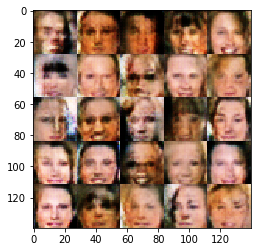

Epoch 1/1... Discriminator Loss: 1.2857... Generator Loss: 0.6993
Epoch 1/1... Discriminator Loss: 1.3638... Generator Loss: 0.6763
Epoch 1/1... Discriminator Loss: 1.3488... Generator Loss: 0.8426
Epoch 1/1... Discriminator Loss: 1.3185... Generator Loss: 0.7508
Epoch 1/1... Discriminator Loss: 1.4359... Generator Loss: 0.6953
Epoch 1/1... Discriminator Loss: 1.3205... Generator Loss: 0.5752
Epoch 1/1... Discriminator Loss: 1.4197... Generator Loss: 0.6850


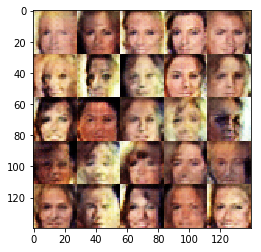

Epoch 1/1... Discriminator Loss: 1.4583... Generator Loss: 0.8637
Epoch 1/1... Discriminator Loss: 1.3499... Generator Loss: 0.7652
Epoch 1/1... Discriminator Loss: 1.3491... Generator Loss: 0.7784
Epoch 1/1... Discriminator Loss: 1.2985... Generator Loss: 0.7919
Epoch 1/1... Discriminator Loss: 1.3780... Generator Loss: 0.7934
Epoch 1/1... Discriminator Loss: 1.3571... Generator Loss: 0.7008
Epoch 1/1... Discriminator Loss: 1.3754... Generator Loss: 0.6891


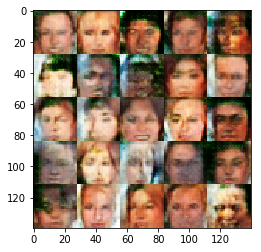

Epoch 1/1... Discriminator Loss: 1.3743... Generator Loss: 0.9110
Epoch 1/1... Discriminator Loss: 1.4556... Generator Loss: 0.7397
Epoch 1/1... Discriminator Loss: 1.4682... Generator Loss: 0.7737
Epoch 1/1... Discriminator Loss: 1.3999... Generator Loss: 0.7194
Epoch 1/1... Discriminator Loss: 1.2945... Generator Loss: 0.7166
Epoch 1/1... Discriminator Loss: 1.3858... Generator Loss: 0.7432


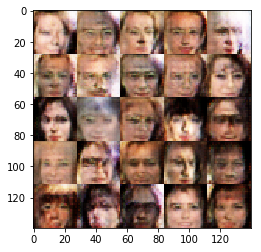

Epoch 1/1... Discriminator Loss: 1.3155... Generator Loss: 0.6979
Epoch 1/1... Discriminator Loss: 1.4811... Generator Loss: 0.7079
Epoch 1/1... Discriminator Loss: 1.3660... Generator Loss: 0.7167
Epoch 1/1... Discriminator Loss: 1.4242... Generator Loss: 0.8264
Epoch 1/1... Discriminator Loss: 1.3847... Generator Loss: 0.6301
Epoch 1/1... Discriminator Loss: 1.3355... Generator Loss: 0.7852
Epoch 1/1... Discriminator Loss: 1.4284... Generator Loss: 0.8225


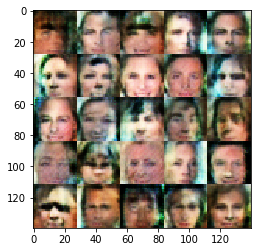

Epoch 1/1... Discriminator Loss: 1.4709... Generator Loss: 0.7103
Epoch 1/1... Discriminator Loss: 1.3772... Generator Loss: 0.7091
Epoch 1/1... Discriminator Loss: 1.3581... Generator Loss: 0.7569
Epoch 1/1... Discriminator Loss: 1.3957... Generator Loss: 0.7460
Epoch 1/1... Discriminator Loss: 1.4340... Generator Loss: 0.6411
Epoch 1/1... Discriminator Loss: 1.5043... Generator Loss: 0.5778
Epoch 1/1... Discriminator Loss: 1.3823... Generator Loss: 0.6674


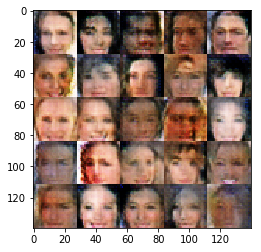

Epoch 1/1... Discriminator Loss: 1.4173... Generator Loss: 0.7105
Epoch 1/1... Discriminator Loss: 1.5193... Generator Loss: 0.6082
Epoch 1/1... Discriminator Loss: 1.3865... Generator Loss: 0.7299
Epoch 1/1... Discriminator Loss: 1.4432... Generator Loss: 0.6750
Epoch 1/1... Discriminator Loss: 1.3213... Generator Loss: 0.7287
Epoch 1/1... Discriminator Loss: 1.3502... Generator Loss: 0.7602


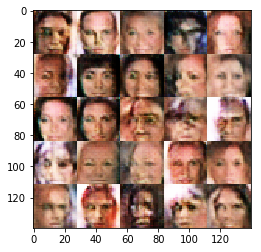

Epoch 1/1... Discriminator Loss: 1.3021... Generator Loss: 0.8173
Epoch 1/1... Discriminator Loss: 1.3220... Generator Loss: 0.8145
Epoch 1/1... Discriminator Loss: 1.3951... Generator Loss: 0.7802
Epoch 1/1... Discriminator Loss: 1.4274... Generator Loss: 0.7194
Epoch 1/1... Discriminator Loss: 1.3805... Generator Loss: 0.6842
Epoch 1/1... Discriminator Loss: 1.3590... Generator Loss: 0.8004
Epoch 1/1... Discriminator Loss: 1.3285... Generator Loss: 0.7742


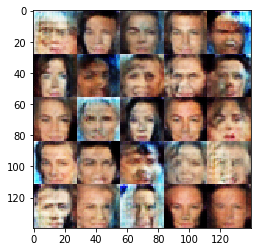

Epoch 1/1... Discriminator Loss: 1.4326... Generator Loss: 0.6621
Epoch 1/1... Discriminator Loss: 1.4573... Generator Loss: 0.7310
Epoch 1/1... Discriminator Loss: 1.3229... Generator Loss: 0.7197
Epoch 1/1... Discriminator Loss: 1.4931... Generator Loss: 0.9028
Epoch 1/1... Discriminator Loss: 1.4927... Generator Loss: 0.6979
Epoch 1/1... Discriminator Loss: 1.3379... Generator Loss: 0.7143
Epoch 1/1... Discriminator Loss: 1.3989... Generator Loss: 0.6599


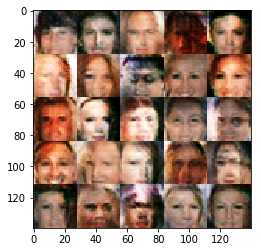

Epoch 1/1... Discriminator Loss: 1.3627... Generator Loss: 0.6884
Epoch 1/1... Discriminator Loss: 1.3956... Generator Loss: 0.5399
Epoch 1/1... Discriminator Loss: 1.4018... Generator Loss: 0.6652
Epoch 1/1... Discriminator Loss: 1.4475... Generator Loss: 0.7264
Epoch 1/1... Discriminator Loss: 1.3898... Generator Loss: 0.5698
Epoch 1/1... Discriminator Loss: 1.4097... Generator Loss: 0.7007


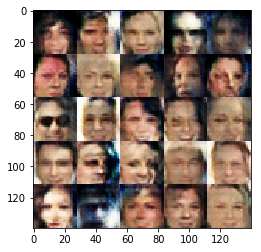

Epoch 1/1... Discriminator Loss: 1.3419... Generator Loss: 0.7405
Epoch 1/1... Discriminator Loss: 1.4268... Generator Loss: 0.6573
Epoch 1/1... Discriminator Loss: 1.3455... Generator Loss: 0.7998
Epoch 1/1... Discriminator Loss: 1.2771... Generator Loss: 0.6494
Epoch 1/1... Discriminator Loss: 1.3950... Generator Loss: 0.7814
Epoch 1/1... Discriminator Loss: 1.4723... Generator Loss: 0.6344
Epoch 1/1... Discriminator Loss: 1.4211... Generator Loss: 0.7341


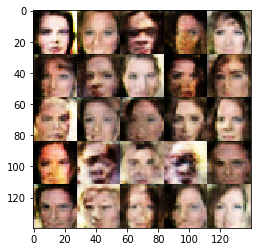

Epoch 1/1... Discriminator Loss: 1.3746... Generator Loss: 0.7898
Epoch 1/1... Discriminator Loss: 1.4583... Generator Loss: 0.6749
Epoch 1/1... Discriminator Loss: 1.4046... Generator Loss: 0.7043
Epoch 1/1... Discriminator Loss: 1.3871... Generator Loss: 0.6871
Epoch 1/1... Discriminator Loss: 1.3721... Generator Loss: 0.8364
Epoch 1/1... Discriminator Loss: 1.3925... Generator Loss: 0.7036
Epoch 1/1... Discriminator Loss: 1.4310... Generator Loss: 0.6747


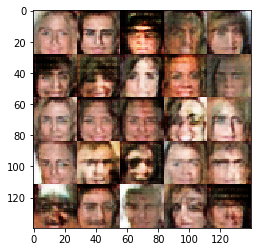

Epoch 1/1... Discriminator Loss: 1.3119... Generator Loss: 0.7514
Epoch 1/1... Discriminator Loss: 1.4061... Generator Loss: 0.7391
Epoch 1/1... Discriminator Loss: 1.3833... Generator Loss: 0.7411
Epoch 1/1... Discriminator Loss: 1.3495... Generator Loss: 0.7388
Epoch 1/1... Discriminator Loss: 1.3383... Generator Loss: 0.7196
Epoch 1/1... Discriminator Loss: 1.3706... Generator Loss: 0.6969


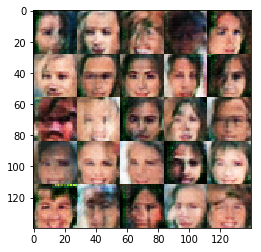

Epoch 1/1... Discriminator Loss: 1.3258... Generator Loss: 0.7619
Epoch 1/1... Discriminator Loss: 1.3461... Generator Loss: 0.7187
Epoch 1/1... Discriminator Loss: 1.4801... Generator Loss: 0.7038
Epoch 1/1... Discriminator Loss: 1.3701... Generator Loss: 0.8274
Epoch 1/1... Discriminator Loss: 1.4424... Generator Loss: 0.7088
Epoch 1/1... Discriminator Loss: 1.4372... Generator Loss: 0.6269
Epoch 1/1... Discriminator Loss: 1.4200... Generator Loss: 0.8310


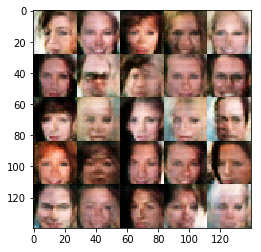

Epoch 1/1... Discriminator Loss: 1.3549... Generator Loss: 0.7051
Epoch 1/1... Discriminator Loss: 1.3899... Generator Loss: 0.7782
Epoch 1/1... Discriminator Loss: 1.4782... Generator Loss: 0.5886
Epoch 1/1... Discriminator Loss: 1.4443... Generator Loss: 0.6467
Epoch 1/1... Discriminator Loss: 1.3275... Generator Loss: 0.7622
Epoch 1/1... Discriminator Loss: 1.3481... Generator Loss: 0.8093
Epoch 1/1... Discriminator Loss: 1.3373... Generator Loss: 0.7859


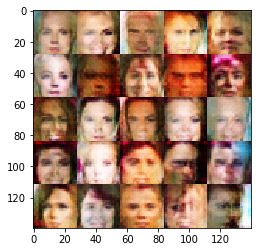

Epoch 1/1... Discriminator Loss: 1.3521... Generator Loss: 0.7600
Epoch 1/1... Discriminator Loss: 1.4163... Generator Loss: 0.6952
Epoch 1/1... Discriminator Loss: 1.4414... Generator Loss: 0.7256
Epoch 1/1... Discriminator Loss: 1.3961... Generator Loss: 0.6874
Epoch 1/1... Discriminator Loss: 1.3995... Generator Loss: 0.6788
Epoch 1/1... Discriminator Loss: 1.3927... Generator Loss: 0.6666


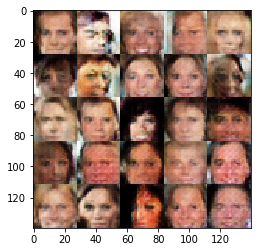

Epoch 1/1... Discriminator Loss: 1.3765... Generator Loss: 0.7722
Epoch 1/1... Discriminator Loss: 1.3360... Generator Loss: 0.7816
Epoch 1/1... Discriminator Loss: 1.3484... Generator Loss: 0.7200
Epoch 1/1... Discriminator Loss: 1.4428... Generator Loss: 0.6005
Epoch 1/1... Discriminator Loss: 1.4433... Generator Loss: 0.6889
Epoch 1/1... Discriminator Loss: 1.4253... Generator Loss: 0.8377
Epoch 1/1... Discriminator Loss: 1.3092... Generator Loss: 0.6523


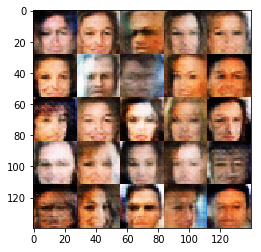

Epoch 1/1... Discriminator Loss: 1.3585... Generator Loss: 0.7233
Epoch 1/1... Discriminator Loss: 1.3353... Generator Loss: 0.6155
Epoch 1/1... Discriminator Loss: 1.3795... Generator Loss: 0.6615
Epoch 1/1... Discriminator Loss: 1.3460... Generator Loss: 0.7670
Epoch 1/1... Discriminator Loss: 1.4091... Generator Loss: 0.6799
Epoch 1/1... Discriminator Loss: 1.3543... Generator Loss: 0.8004
Epoch 1/1... Discriminator Loss: 1.3459... Generator Loss: 0.7219


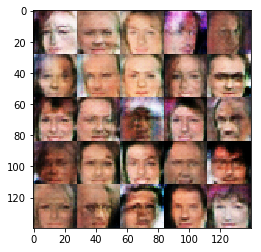

Epoch 1/1... Discriminator Loss: 1.2730... Generator Loss: 0.7893
Epoch 1/1... Discriminator Loss: 1.4164... Generator Loss: 0.6398
Epoch 1/1... Discriminator Loss: 1.4160... Generator Loss: 0.7342
Epoch 1/1... Discriminator Loss: 1.4371... Generator Loss: 0.6576
Epoch 1/1... Discriminator Loss: 1.3329... Generator Loss: 0.8210
Epoch 1/1... Discriminator Loss: 1.3485... Generator Loss: 0.7575


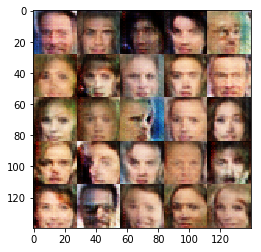

Epoch 1/1... Discriminator Loss: 1.3010... Generator Loss: 0.7388
Epoch 1/1... Discriminator Loss: 1.4743... Generator Loss: 0.6825
Epoch 1/1... Discriminator Loss: 1.3450... Generator Loss: 0.7614
Epoch 1/1... Discriminator Loss: 1.3898... Generator Loss: 0.7112
Epoch 1/1... Discriminator Loss: 1.3921... Generator Loss: 0.7699
Epoch 1/1... Discriminator Loss: 1.3332... Generator Loss: 0.8343
Epoch 1/1... Discriminator Loss: 1.5306... Generator Loss: 0.6386


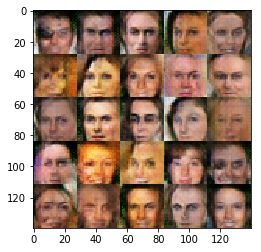

Epoch 1/1... Discriminator Loss: 1.3797... Generator Loss: 0.7294
Epoch 1/1... Discriminator Loss: 1.3555... Generator Loss: 0.6631
Epoch 1/1... Discriminator Loss: 1.4380... Generator Loss: 0.7150
Epoch 1/1... Discriminator Loss: 1.4378... Generator Loss: 0.7188
Epoch 1/1... Discriminator Loss: 1.4365... Generator Loss: 0.6876
Epoch 1/1... Discriminator Loss: 1.3918... Generator Loss: 0.7608
Epoch 1/1... Discriminator Loss: 1.4201... Generator Loss: 0.7218


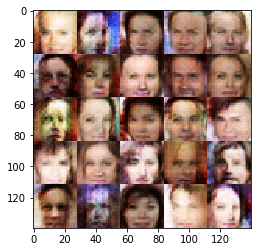

Epoch 1/1... Discriminator Loss: 1.4073... Generator Loss: 0.7101
Epoch 1/1... Discriminator Loss: 1.4029... Generator Loss: 0.6932
Epoch 1/1... Discriminator Loss: 1.3673... Generator Loss: 0.7270
Epoch 1/1... Discriminator Loss: 1.4615... Generator Loss: 0.6937
Epoch 1/1... Discriminator Loss: 1.3492... Generator Loss: 0.8177
Epoch 1/1... Discriminator Loss: 1.4133... Generator Loss: 0.6832


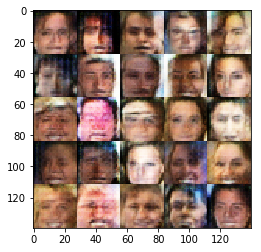

Epoch 1/1... Discriminator Loss: 1.4715... Generator Loss: 0.6332
Epoch 1/1... Discriminator Loss: 1.4413... Generator Loss: 0.6382
Epoch 1/1... Discriminator Loss: 1.4052... Generator Loss: 0.7074
Epoch 1/1... Discriminator Loss: 1.3396... Generator Loss: 0.7386
Epoch 1/1... Discriminator Loss: 1.3632... Generator Loss: 0.7107
Epoch 1/1... Discriminator Loss: 1.3797... Generator Loss: 0.7800
Epoch 1/1... Discriminator Loss: 1.4974... Generator Loss: 0.6911


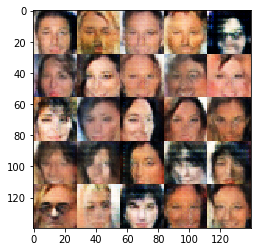

Epoch 1/1... Discriminator Loss: 1.4196... Generator Loss: 0.6876
Epoch 1/1... Discriminator Loss: 1.4497... Generator Loss: 0.6839
Epoch 1/1... Discriminator Loss: 1.3690... Generator Loss: 0.7581
Epoch 1/1... Discriminator Loss: 1.3662... Generator Loss: 0.7460
Epoch 1/1... Discriminator Loss: 1.4200... Generator Loss: 0.7262
Epoch 1/1... Discriminator Loss: 1.3706... Generator Loss: 0.7260
Epoch 1/1... Discriminator Loss: 1.3947... Generator Loss: 0.7215


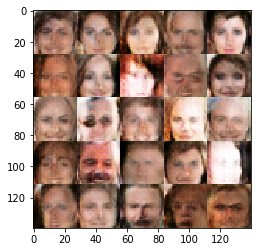

Epoch 1/1... Discriminator Loss: 1.3053... Generator Loss: 0.8087
Epoch 1/1... Discriminator Loss: 1.4105... Generator Loss: 0.7430
Epoch 1/1... Discriminator Loss: 1.3613... Generator Loss: 0.7554
Epoch 1/1... Discriminator Loss: 1.3287... Generator Loss: 0.7355
Epoch 1/1... Discriminator Loss: 1.3581... Generator Loss: 0.7339
Epoch 1/1... Discriminator Loss: 1.4063... Generator Loss: 0.7633


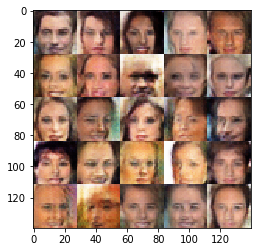

Epoch 1/1... Discriminator Loss: 1.3704... Generator Loss: 0.7410
Epoch 1/1... Discriminator Loss: 1.3204... Generator Loss: 0.8463
Epoch 1/1... Discriminator Loss: 1.4093... Generator Loss: 0.7180
Epoch 1/1... Discriminator Loss: 1.3472... Generator Loss: 0.7390
Epoch 1/1... Discriminator Loss: 1.3950... Generator Loss: 0.7700
Epoch 1/1... Discriminator Loss: 1.4060... Generator Loss: 0.6891
Epoch 1/1... Discriminator Loss: 1.4189... Generator Loss: 0.7198


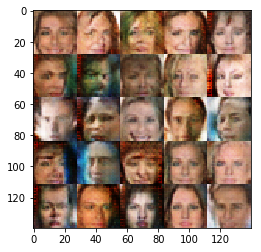

Epoch 1/1... Discriminator Loss: 1.3736... Generator Loss: 0.7396
Epoch 1/1... Discriminator Loss: 1.3737... Generator Loss: 0.7436
Epoch 1/1... Discriminator Loss: 1.3555... Generator Loss: 0.8128
Epoch 1/1... Discriminator Loss: 1.4390... Generator Loss: 0.6962
Epoch 1/1... Discriminator Loss: 1.3713... Generator Loss: 0.7406
Epoch 1/1... Discriminator Loss: 1.4408... Generator Loss: 0.7304
Epoch 1/1... Discriminator Loss: 1.3639... Generator Loss: 0.7636


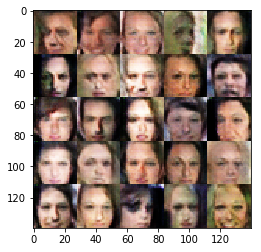

Epoch 1/1... Discriminator Loss: 1.3679... Generator Loss: 0.7400
Epoch 1/1... Discriminator Loss: 1.4084... Generator Loss: 0.7752
Epoch 1/1... Discriminator Loss: 1.3722... Generator Loss: 0.7333
Epoch 1/1... Discriminator Loss: 1.3112... Generator Loss: 0.7420
Epoch 1/1... Discriminator Loss: 1.3358... Generator Loss: 0.7824
Epoch 1/1... Discriminator Loss: 1.3893... Generator Loss: 0.8082


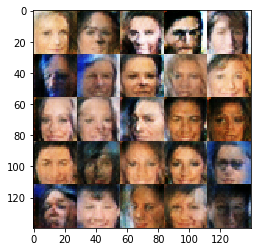

Epoch 1/1... Discriminator Loss: 1.3864... Generator Loss: 0.7336
Epoch 1/1... Discriminator Loss: 1.4165... Generator Loss: 0.7434
Epoch 1/1... Discriminator Loss: 1.4094... Generator Loss: 0.7133
Epoch 1/1... Discriminator Loss: 1.3690... Generator Loss: 0.6706
Epoch 1/1... Discriminator Loss: 1.4066... Generator Loss: 0.7255
Epoch 1/1... Discriminator Loss: 1.4270... Generator Loss: 0.6648
Epoch 1/1... Discriminator Loss: 1.4268... Generator Loss: 0.7460


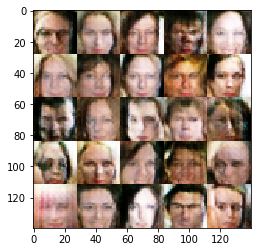

Epoch 1/1... Discriminator Loss: 1.4135... Generator Loss: 0.7771
Epoch 1/1... Discriminator Loss: 1.3964... Generator Loss: 0.7015
Epoch 1/1... Discriminator Loss: 1.4467... Generator Loss: 0.7080
Epoch 1/1... Discriminator Loss: 1.4304... Generator Loss: 0.7215
Epoch 1/1... Discriminator Loss: 1.3827... Generator Loss: 0.7831
Epoch 1/1... Discriminator Loss: 1.3843... Generator Loss: 0.7646
Epoch 1/1... Discriminator Loss: 1.3593... Generator Loss: 0.7186


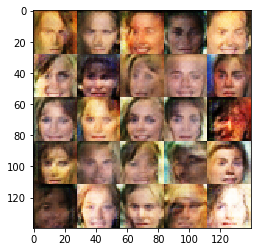

Epoch 1/1... Discriminator Loss: 1.4172... Generator Loss: 0.7587
Epoch 1/1... Discriminator Loss: 1.3593... Generator Loss: 0.7266
Epoch 1/1... Discriminator Loss: 1.3845... Generator Loss: 0.7346
Epoch 1/1... Discriminator Loss: 1.3570... Generator Loss: 0.7530
Epoch 1/1... Discriminator Loss: 1.3931... Generator Loss: 0.7497
Epoch 1/1... Discriminator Loss: 1.4354... Generator Loss: 0.7054


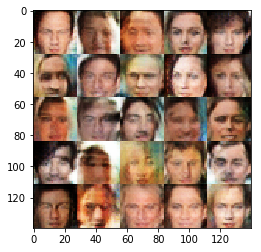

Epoch 1/1... Discriminator Loss: 1.4267... Generator Loss: 0.6761
Epoch 1/1... Discriminator Loss: 1.3721... Generator Loss: 0.7427
Epoch 1/1... Discriminator Loss: 1.4135... Generator Loss: 0.7551
Epoch 1/1... Discriminator Loss: 1.3864... Generator Loss: 0.7165
Epoch 1/1... Discriminator Loss: 1.3765... Generator Loss: 0.7678
Epoch 1/1... Discriminator Loss: 1.3901... Generator Loss: 0.7720
Epoch 1/1... Discriminator Loss: 1.4030... Generator Loss: 0.7364


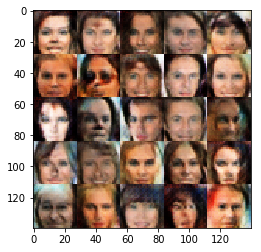

Epoch 1/1... Discriminator Loss: 1.3875... Generator Loss: 0.7477
Epoch 1/1... Discriminator Loss: 1.3782... Generator Loss: 0.7422
Epoch 1/1... Discriminator Loss: 1.4150... Generator Loss: 0.7110
Epoch 1/1... Discriminator Loss: 1.3987... Generator Loss: 0.7360
Epoch 1/1... Discriminator Loss: 1.3652... Generator Loss: 0.7147
Epoch 1/1... Discriminator Loss: 1.3483... Generator Loss: 0.7672
Epoch 1/1... Discriminator Loss: 1.3451... Generator Loss: 0.8156


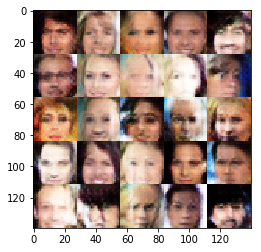

Epoch 1/1... Discriminator Loss: 1.3953... Generator Loss: 0.7343
Epoch 1/1... Discriminator Loss: 1.3985... Generator Loss: 0.7413
Epoch 1/1... Discriminator Loss: 1.3789... Generator Loss: 0.7591
Epoch 1/1... Discriminator Loss: 1.3874... Generator Loss: 0.7737
Epoch 1/1... Discriminator Loss: 1.4086... Generator Loss: 0.7353
Epoch 1/1... Discriminator Loss: 1.3657... Generator Loss: 0.6961


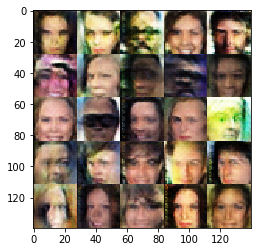

Epoch 1/1... Discriminator Loss: 1.3964... Generator Loss: 0.7165
Epoch 1/1... Discriminator Loss: 1.3728... Generator Loss: 0.7937
Epoch 1/1... Discriminator Loss: 1.4229... Generator Loss: 0.7209
Epoch 1/1... Discriminator Loss: 1.3659... Generator Loss: 0.7872
Epoch 1/1... Discriminator Loss: 1.3746... Generator Loss: 0.7885
Epoch 1/1... Discriminator Loss: 1.3888... Generator Loss: 0.7438
Epoch 1/1... Discriminator Loss: 1.4185... Generator Loss: 0.7315


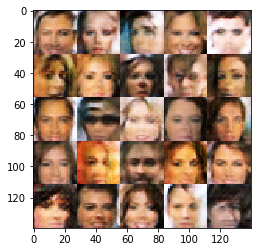

Epoch 1/1... Discriminator Loss: 1.3442... Generator Loss: 0.7700
Epoch 1/1... Discriminator Loss: 1.4015... Generator Loss: 0.7385
Epoch 1/1... Discriminator Loss: 1.4525... Generator Loss: 0.7228
Epoch 1/1... Discriminator Loss: 1.3477... Generator Loss: 0.7821
Epoch 1/1... Discriminator Loss: 1.4192... Generator Loss: 0.7428
Epoch 1/1... Discriminator Loss: 1.3636... Generator Loss: 0.7986
Epoch 1/1... Discriminator Loss: 1.4323... Generator Loss: 0.7140


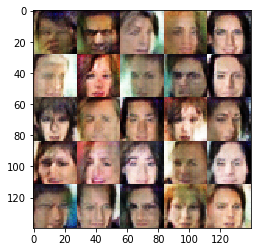

Epoch 1/1... Discriminator Loss: 1.3682... Generator Loss: 0.7456
Epoch 1/1... Discriminator Loss: 1.4169... Generator Loss: 0.7557
Epoch 1/1... Discriminator Loss: 1.3736... Generator Loss: 0.7818
Epoch 1/1... Discriminator Loss: 1.3897... Generator Loss: 0.7358
Epoch 1/1... Discriminator Loss: 1.3856... Generator Loss: 0.7359
Epoch 1/1... Discriminator Loss: 1.3763... Generator Loss: 0.7828


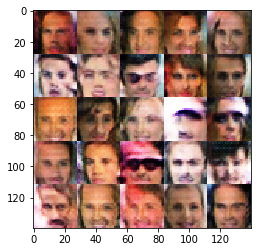

Epoch 1/1... Discriminator Loss: 1.3642... Generator Loss: 0.7820
Epoch 1/1... Discriminator Loss: 1.4041... Generator Loss: 0.7346
Epoch 1/1... Discriminator Loss: 1.4450... Generator Loss: 0.7185
Epoch 1/1... Discriminator Loss: 1.3749... Generator Loss: 0.7469
Epoch 1/1... Discriminator Loss: 1.3712... Generator Loss: 0.7855
Epoch 1/1... Discriminator Loss: 1.4144... Generator Loss: 0.7255
Epoch 1/1... Discriminator Loss: 1.4172... Generator Loss: 0.7099


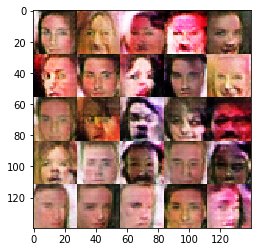

Epoch 1/1... Discriminator Loss: 1.3694... Generator Loss: 0.7347
Epoch 1/1... Discriminator Loss: 1.3390... Generator Loss: 0.7846
Epoch 1/1... Discriminator Loss: 1.4210... Generator Loss: 0.7269
Epoch 1/1... Discriminator Loss: 1.3907... Generator Loss: 0.7457
Epoch 1/1... Discriminator Loss: 1.3757... Generator Loss: 0.7330
Epoch 1/1... Discriminator Loss: 1.4018... Generator Loss: 0.7382
Epoch 1/1... Discriminator Loss: 1.3946... Generator Loss: 0.7453


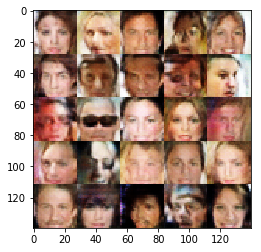

Epoch 1/1... Discriminator Loss: 1.3910... Generator Loss: 0.7616
Epoch 1/1... Discriminator Loss: 1.3905... Generator Loss: 0.7465
Epoch 1/1... Discriminator Loss: 1.3714... Generator Loss: 0.7744
Epoch 1/1... Discriminator Loss: 1.3286... Generator Loss: 0.7902
Epoch 1/1... Discriminator Loss: 1.3690... Generator Loss: 0.7747
Epoch 1/1... Discriminator Loss: 1.4233... Generator Loss: 0.7456


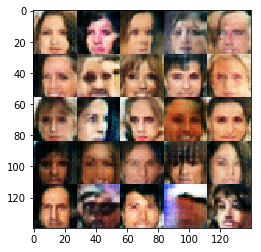

Epoch 1/1... Discriminator Loss: 1.3686... Generator Loss: 0.7570
Epoch 1/1... Discriminator Loss: 1.3715... Generator Loss: 0.7875
Epoch 1/1... Discriminator Loss: 1.3817... Generator Loss: 0.7818
Epoch 1/1... Discriminator Loss: 1.4135... Generator Loss: 0.7175
Epoch 1/1... Discriminator Loss: 1.3705... Generator Loss: 0.7520
Epoch 1/1... Discriminator Loss: 1.4152... Generator Loss: 0.7266
Epoch 1/1... Discriminator Loss: 1.3880... Generator Loss: 0.7836


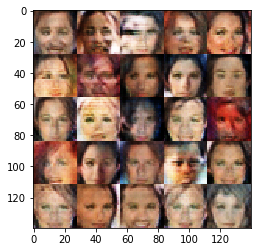

Epoch 1/1... Discriminator Loss: 1.3923... Generator Loss: 0.8109
Epoch 1/1... Discriminator Loss: 1.3389... Generator Loss: 0.8183
Epoch 1/1... Discriminator Loss: 1.4031... Generator Loss: 0.7449
Epoch 1/1... Discriminator Loss: 1.3096... Generator Loss: 0.8006
Epoch 1/1... Discriminator Loss: 1.3951... Generator Loss: 0.7860
Epoch 1/1... Discriminator Loss: 1.4768... Generator Loss: 0.7093
Epoch 1/1... Discriminator Loss: 1.3934... Generator Loss: 0.7353


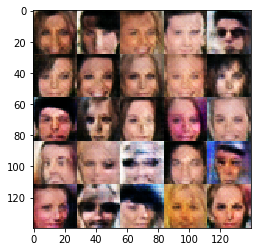

Epoch 1/1... Discriminator Loss: 1.4226... Generator Loss: 0.6957
Epoch 1/1... Discriminator Loss: 1.4114... Generator Loss: 0.7493
Epoch 1/1... Discriminator Loss: 1.3710... Generator Loss: 0.7697
Epoch 1/1... Discriminator Loss: 1.3779... Generator Loss: 0.7345
Epoch 1/1... Discriminator Loss: 1.3528... Generator Loss: 0.7579
Epoch 1/1... Discriminator Loss: 1.3683... Generator Loss: 0.7782


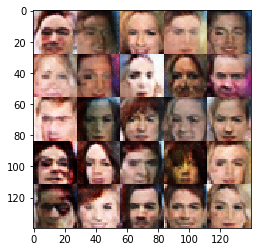

Epoch 1/1... Discriminator Loss: 1.3826... Generator Loss: 0.7669
Epoch 1/1... Discriminator Loss: 1.3819... Generator Loss: 0.6847
Epoch 1/1... Discriminator Loss: 1.3674... Generator Loss: 0.7354
Epoch 1/1... Discriminator Loss: 1.3774... Generator Loss: 0.7556
Epoch 1/1... Discriminator Loss: 1.3655... Generator Loss: 0.7804
Epoch 1/1... Discriminator Loss: 1.3666... Generator Loss: 0.8030
Epoch 1/1... Discriminator Loss: 1.3921... Generator Loss: 0.7166


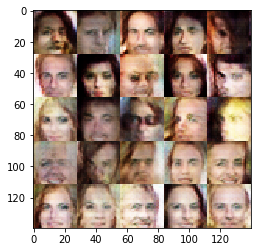

Epoch 1/1... Discriminator Loss: 1.3505... Generator Loss: 0.6718
Epoch 1/1... Discriminator Loss: 1.3839... Generator Loss: 0.7510
Epoch 1/1... Discriminator Loss: 1.3744... Generator Loss: 0.7471
Epoch 1/1... Discriminator Loss: 1.3764... Generator Loss: 0.7818
Epoch 1/1... Discriminator Loss: 1.3709... Generator Loss: 0.7351
Epoch 1/1... Discriminator Loss: 1.3908... Generator Loss: 0.7785
Epoch 1/1... Discriminator Loss: 1.3780... Generator Loss: 0.7905


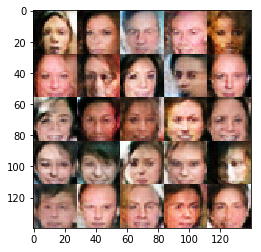

Epoch 1/1... Discriminator Loss: 1.3931... Generator Loss: 0.7787
Epoch 1/1... Discriminator Loss: 1.4597... Generator Loss: 0.6243


In [14]:
batch_size = 16
z_dim = 256
learning_rate = 0.001
beta1 = 0.2
print_every = 30
show_every = 200
n_images = 25


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.